# Algorithmic Complexity

Profiling (e.g. with `timeit`) doesn’t tell us much about how an algorithm will perform on a different computer since it is determined by the hardware features. To compare performance in a device-indpendent fashion, a formalism (a.k.a the "Big-O") is used that characterizes functions in terms of their rates of growth as a function of the size *n* of the input.

An algorithm is compared to a given function $g(n)$ with a well defined scaling with *n*, e.g. $n^2$; if the ratio of the two is bounded, than that algorithm is ${\cal O}(g(n))$. Note that:
* Only the largest terms in the scaling of $g(n)$ is kept in the notation
* two algorithms can have the same complexity and have very different performance; the same complexity only implies that the difference in performance is independent of *n*.


#### Notes
Usually

### Comparing bubble sort ${\cal O}(n^2)$ and merge sort ${\cal O}(n\log{n})$




In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


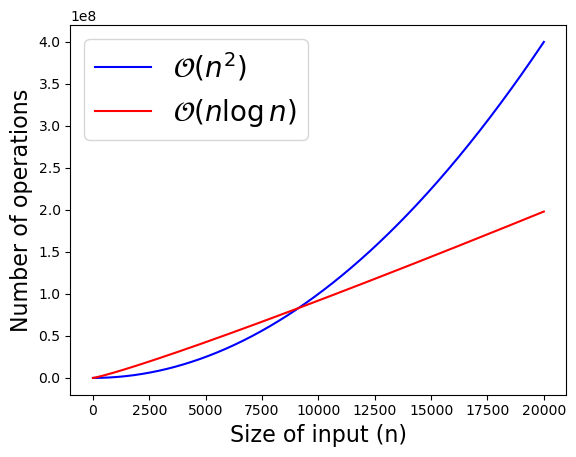

In [24]:
def f1(n, k):
    return k*n*n

def f2(n, k):
    return k*n*np.log(n)

n = np.arange(0.1, 20001)
plt.plot(n, f1(n, 1), c='blue')
plt.plot(n, f2(n, 1000), c='red')
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend([r'$\mathcal{O}(n^2)$', r'$\mathcal{O}(n \log n)$'], loc='best', fontsize=20);
plt.show()


See [here](https://wiki.python.org/moin/TimeComplexity) for the complexity of operations on standard Python data structures. Note for instance that searching a list is much more expensive than searching a dictionary.

Here a few examples:

#### O(1) - Constant Time Complexity

An algorithm with constant time complexity performs the same number of steps regardless of input size.

In [ ]:
def get_first_element(array):
    return array[0]  # Always takes one step.

#### O(n) - Linear Time Complexity
An algorithm with linear time complexity performs a number of steps proportional to the size of the input.

In [ ]:
def print_pairs(array):
    for i in range(len(array)):
        for j in range(len(array)):
            print(array[i], array[j])  # Prints every pair of elements.

#### O(n^2) - Quadratic Time Complexity
An algorithm with quadratic time complexity often involves nested loops.

In [ ]:
def print_pairs(array):
    for i in range(len(array)):
        for j in range(len(array)):
            print(array[i], array[j])  # Prints every pair of elements.


#### O(log n) - Logarithmic Time Complexity
Logarithmic complexity arises when the problem size reduces by a constant factor in each step, such as binary search.

In [ ]:
def binary_search(array, target):
    left, right = 0, len(array) - 1
    while left <= right:
        mid = (left + right) // 2
        if array[mid] == target:
            return mid  # Found the target.
        elif array[mid] < target:
            left = mid + 1  # Search in the right half.
        else:
            right = mid - 1  # Search in the left half.
    return -1  # Target not found.


#### O(n log n) - Linearithmic Time Complexity
Sorting algorithms like merge sort and quicksort have 
$O(n\log n)$ complexity.

In [ ]:
def merge_sort(array):
    if len(array) <= 1:
        return array
    mid = len(array) // 2
    left = merge_sort(array[:mid])
    right = merge_sort(array[mid:])
    return merge(left, right)


In [ ]:
def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

#### O(2^n) - Exponential Time Complexity
An algorithm with exponential complexity often explores all possible combinations, such as solving the Traveling Salesman Problem with brute force, where $2^n$ arises because for n cities, with the algorithm essentially exploring all subsets of cities as part of the recursion.

In [ ]:
def tsp_brute_force(graph, current, visited, start):
    if len(visited) == len(graph):  # If all cities are visited
        return graph[current][start]  # Return to the start city
    
    min_cost = float('inf')
    for next_city in graph:
        if next_city not in visited:  # Visit unvisited cities
            visited.add(next_city)
            cost = graph[current][next_city] + tsp_brute_force(graph, next_city, visited, start)
            min_cost = min(min_cost, cost)
            visited.remove(next_city)
    return min_cost


#### O(n!) - Factorial Time Complexity
The Traveling Salesman Problem can be implemented also witha factorial complexity if it explicitly involves computing the cost for every permutation of the cities, which are $n!$  

In [ ]:
from itertools import permutations

def traveling_salesman(graph, start):
    nodes = list(graph.keys())
    nodes.remove(start)
    shortest_path = float('inf')
    for perm in permutations(nodes):
        current_path_weight = 0
        current_node = start
        for next_node in perm:
            current_path_weight += graph[current_node][next_node]
            current_node = next_node
        current_path_weight += graph[current_node][start]  # Return to start
        shortest_path = min(shortest_path, current_path_weight)
    return shortest_path

## Space Complexity

We can also use ${\cal O}$ notation in the same way to measure the space complexity of an algorithm.  The notion of space complexity becomes important when your data volume is of the same magnitude or larger than the memory you have available. In that case, an algorihtm with high space complexity may end up having to swap memory constantly, and will perform far worse than its time complexity would suggest.

Just as you should have a good idea of how your algorithm will scale with increasing *n*, you should also be able to know how much memory your data structures will require. For example, if you had an $n\times p$ matrix of integers, an $n\times p$ matrix of floats, and an $n\times p$ matrix of complex floats, how large can $n$ and $p$ be before you run out of RAM to store them?

In [6]:
# Notice how much overhead Python objects have
# A raw integer should be 64 bits or 8 bytes only

import sys
print (sys.getsizeof(1))
print (sys.getsizeof(1234567890123456789012345678901234567890))
print (sys.getsizeof(3.14))
print (sys.getsizeof(3j))
print (sys.getsizeof('a'))
print (sys.getsizeof('hello world'))

28
44
24
32
42
52


In [7]:
print (np.ones((100,100), dtype='byte').nbytes)
print (np.ones((100,100), dtype='i2').nbytes)
print (np.ones((100,100), dtype='int').nbytes) # default is 64 bits or 8 bytes
print (np.ones((100,100), dtype='f4').nbytes)
print (np.ones((100,100), dtype='float').nbytes) # default is 64 bits or 8 bytes
print (np.ones((100,100), dtype='complex').nbytes)

10000
20000
80000
40000
80000
160000


# Scipy: high-level scientific computing

The `scipy` package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`scipy` can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab’s toolboxes. `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and `scipy` work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in `scipy`. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, `scipy`’s routines are optimized and tested, and should therefore be used when possible.

---

#### Notes
Implementing something from scratch teaches you how it works, but there possibly exist a more efficient solution created byh someone else...

# Linear algebra with scipy and numpy

The `scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

We will review a few examples and applications. Sometimes numpy implements those methods too: if a given algorithm is present both in numpy and scipy, typically the latter is more performant.

In [8]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

# to limit the printout
%precision 4
np.set_printoptions(suppress=True)


In [9]:
# norm of a vector
v = np.array([1,2])
print (la.norm(v))

# distance between two vectors
w = np.array([1,1])
print (la.norm(v-w))

# inner products 
print (v.dot(w))



2.23606797749979
1.0
3


### Elaborate example: covariance matrix as outer product

The inner product is just matrix multiplication of a 1×n vector with an n×1 vector.
The outer product of two vectors is instead just the opposite. It is given by:

$$
v\otimes w=vw^t
$$

Note that $v$ and $w$ are column vectors. The result of the inner product is a scalar. The result of the outer product is a matrix.

In [10]:
print (np.outer(v,w))

[[1 1]
 [2 2]]


Suppose now we measure 4 quantities, each 10 times. Let's assume each quantity is flat distributed in the $[0-1]$ interval

In [11]:
n, p = 10, 4
v = np.random.random((p,n))
v

array([[0.1476, 0.1357, 0.1755, 0.879 , 0.9478, 0.6991, 0.8724, 0.2866,
        0.6914, 0.1207],
       [0.0467, 0.823 , 0.6331, 0.7865, 0.7909, 0.8446, 0.5176, 0.9464,
        0.6926, 0.0201],
       [0.4553, 0.5682, 0.3889, 0.6957, 0.3922, 0.7199, 0.1621, 0.7891,
        0.5221, 0.6607],
       [0.67  , 0.9491, 0.7762, 0.3768, 0.5834, 0.3087, 0.9714, 0.0094,
        0.7064, 0.0088]])

Let's recall the definition of the covariance matrix:

$$
{\rm Cov}(X_i,X_j)=\frac{\sum_{h=1}^n (X_{hi}-\bar{X_i})(X_{hj}-\bar{X_j})}{n-1}
$$

with Cov$(X,X)$ the variance of the variable $X$.

In [12]:
np.cov(v)

array([[ 0.1234,  0.049 , -0.0162,  0.0163],
       [ 0.049 ,  0.1065,  0.0155,  0.0059],
       [-0.0162,  0.0155,  0.0365, -0.0523],
       [ 0.0163,  0.0059, -0.0523,  0.1222]])

In [13]:
# compute the mean of each sequence and set the right shape
v_mean= v.mean(1)[:, np.newaxis]
print (v_mean)

# re-center each sequence around its mean
w = v - v_mean
print (w)

# compute the covariance matrix
cov=w.dot(w.T)/(n - 1)
print (cov)

[[0.4956]
 [0.6102]
 [0.5354]
 [0.536 ]]
[[-0.348  -0.3598 -0.3201  0.3834  0.4522  0.2035  0.3768 -0.209   0.1958
  -0.3749]
 [-0.5634  0.2128  0.0229  0.1764  0.1808  0.2345 -0.0926  0.3363  0.0824
  -0.59  ]
 [-0.0802  0.0328 -0.1465  0.1603 -0.1432  0.1845 -0.3734  0.2536 -0.0133
   0.1253]
 [ 0.1339  0.4131  0.2402 -0.1592  0.0474 -0.2274  0.4354 -0.5266  0.1704
  -0.5272]]
[[ 0.1234  0.049  -0.0162  0.0163]
 [ 0.049   0.1065  0.0155  0.0059]
 [-0.0162  0.0155  0.0365 -0.0523]
 [ 0.0163  0.0059 -0.0523  0.1222]]


### Traces and determinants

In [14]:
n = 6
M = np.random.randint(100,size=(n,n))
print(M,'\n')
print ('determinant:',la.det(M),'\n')
print ('trace:',M.trace(),'\n')

[[16 89  7 56 54 20]
 [65 12 44 90 87 33]
 [26 92 31 60 40 93]
 [38 37 16 94 81 99]
 [49 21 94 13 75 78]
 [73  9 86 18 75 44]] 

determinant: -43525800079.99999 

trace: 272 



## Matrix Decomposition

Often data analysis problems boil down to solving linear systems. An example is the [Netflix Competition](https://en.wikipedia.org/wiki/Netflix_Prize), where a matrix of $400000\times18000$ (ratings times movies) needed to be dealt with. 

Matrix decompositions are an important step in solving linear systems in a computationally efficient manner.

### Lower-Upper factorization

Let A be a square matrix. An LU factorization refers to the factorization of A, with proper row and/or column orderings or permutations, into two factors – a lower triangular matrix L and an upper triangular matrix U:

$A=LU$

when solving a system of linear equations, $Ax=b=LUx$, the solution is done in two logical steps:
1. solve $Ly=b$ for $y$.
2. solve $Ux=y$ for $x$.

Often a permutation $P$ is needed (*partial pivoting*) to best reorder the rows of the original matrix

In [15]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])
print(A,'\n')

P, L, U = la.lu(A)
print(np.dot(P.T, A),'\n')
print(np.dot(L, U),'\n')
print(P,'\n')
print(L,'\n')
print(U,'\n')

[[1 3 4]
 [2 1 3]
 [4 1 2]] 

[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

[[1.     0.     0.    ]
 [0.25   1.     0.    ]
 [0.5    0.1818 1.    ]] 

[[4.     1.     2.    ]
 [0.     2.75   3.5   ]
 [0.     0.     1.3636]] 



### Eigendecomposition

Given an $n\times n$ matrix $A$, with $\det{A}\ne0$, then there exist n  linearly independent eigenvectors and $A$ may be decomposed in the following manner:

$$ 
A=V\Lambda V^{-1}
$$

where $\Lambda$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$ and the columns of $V$ are the corresponding eigenvectors of $A$.

Eigenvalues are roots of the *characteristic polynomial* of $A$:

$$
\det{(A-\lambda I)}=0
$$


In [16]:
A = np.array([[0,1,1],[2,1,0],[3,4,5]])
print (A)
print(la.det(A),'\n')


l, V = la.eig(A)
print (V)
print (l)
print(np.real_if_close(l))

[[0 1 1]
 [2 1 0]
 [3 4 5]]
-5.0 

[[ 0.1802  0.6721 -0.    ]
 [ 0.0743 -0.7249 -0.7071]
 [ 0.9808  0.1509  0.7071]]
[ 5.8541+0.j -0.8541+0.j  1.    +0.j]
[ 5.8541 -0.8541  1.    ]


In [17]:
print(np.dot(V,np.dot(np.diag(np.real_if_close(l)), la.inv(V))),'\n')

[[ 0.  1.  1.]
 [ 2.  1. -0.]
 [ 3.  4.  5.]] 



### Singular Value Decomposition

Another important matrix decomposition is singular value decomposition or SVD. For any $m\times n$ matrix $A$, we may write:

$$A=UDV^T$$

where $U$ is a orthogonal $m\times m$ matrix, $D$ (spectrum) is a rectangular, diagonal $m\times n$ matrix with diagonal entries $d_1,\dots,d_m$ all non-negative, $V$ is an orthogonal $n\times n$ matrix.

The singular-value decomposition is a generalization of the eigendecomposition in the sense that it can be applied to any $m \times n$ matrix whereas eigenvalue decomposition can only be applied to diagonalizable matrices. 

Given an SVD of $A$, as described above, the following holds:

$$
A^T A = VD^TU^T UDV^T = VD^TDV^T 
$$
$$
A A^T = UD^TV^T VDU^T = UD^TDU^T 
$$

The right-hand sides of these relations describe the eigenvalue decompositions of the left-hand sides. Consequently:
* The columns of V (right-singular vectors) are eigenvectors of $A^TA$.
* The columns of U (left-singular vectors) are eigenvectors of $AA^T$.
* The non-zero elements of D (non-zero singular values) are the square roots of the non-zero eigenvalues of $A^TA$ or $AA^T$.

A geometrical representation of SVD is given by the following figure:

----
#### Notes
Usually m<<n

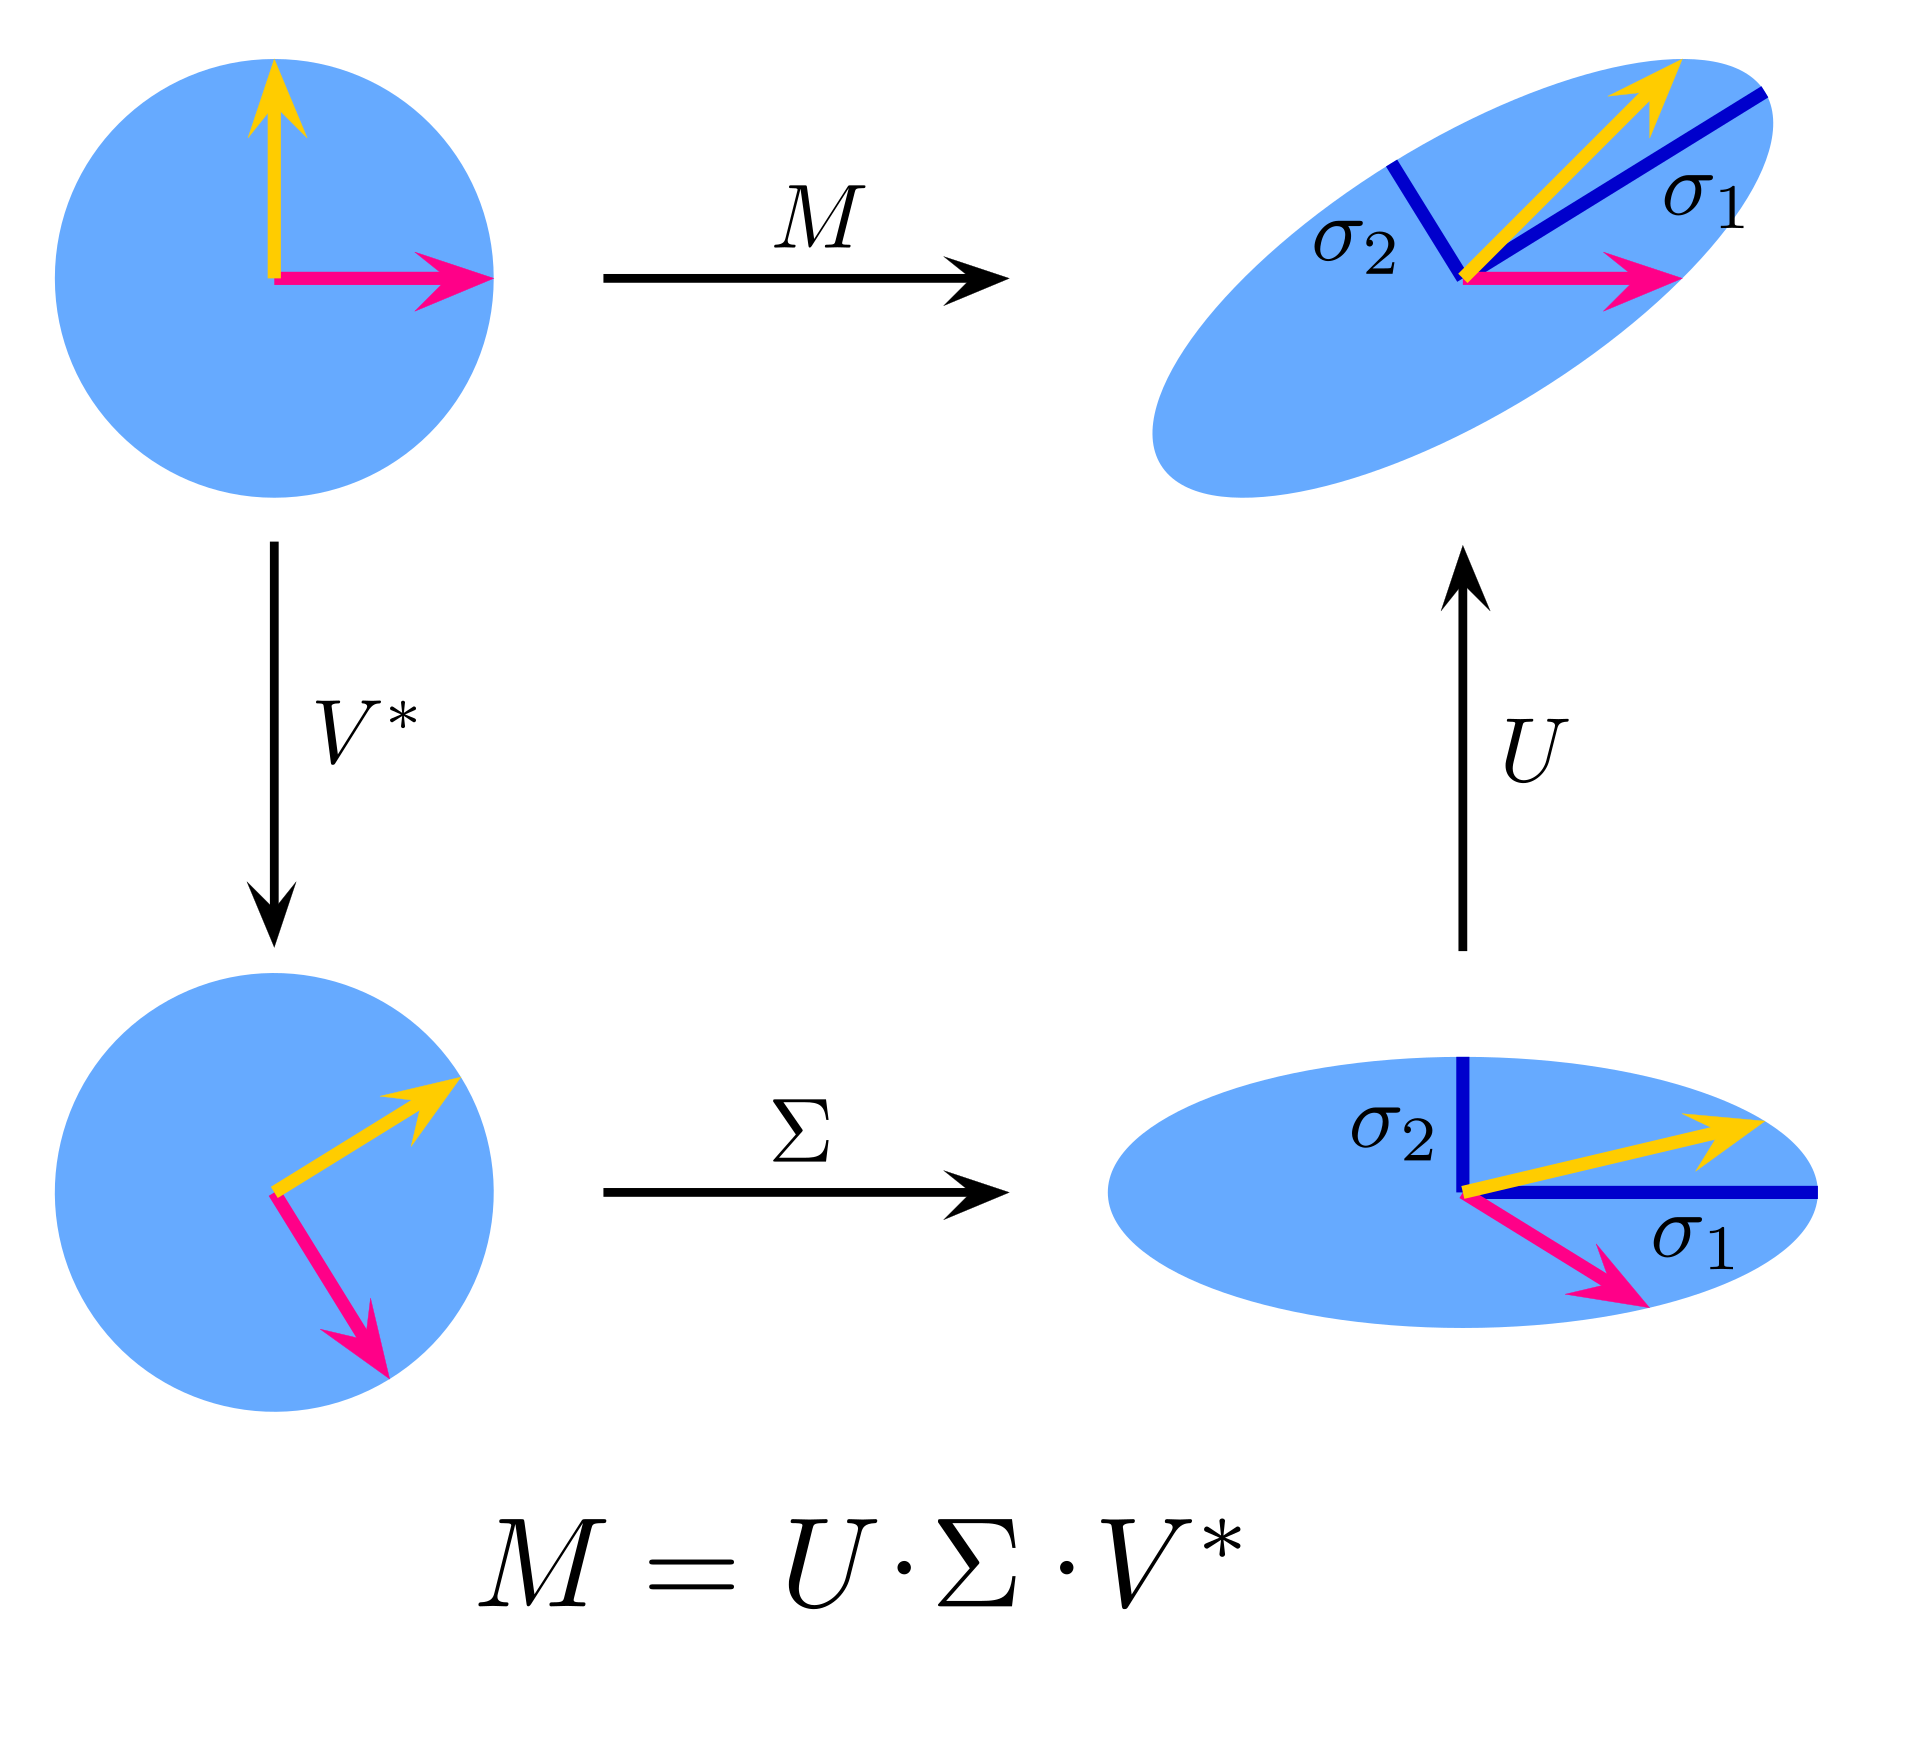

In [18]:
from IPython.display import Image
Image("Singular-Value-Decomposition.png")

In [19]:
m, n = 5, 4
A = np.random.randn(m, n) #+ 1.j*np.random.randn(m, n)
print (A,'\n')

U, spectrum, Vt = la.svd(A)

print("shapes:", U.shape,  spectrum.shape, Vt.shape)

print (spectrum,'\n')
print (U,'\n')
print (Vt,'\n')

[[ 0.3121  0.3112  1.0592  1.0497]
 [ 0.169   0.3627 -2.1552 -1.3778]
 [ 2.5464 -2.1693 -1.1263  0.4538]
 [-0.5858  0.3208 -0.0205 -0.2719]
 [-1.162   0.3175 -0.5441  0.0959]] 

shapes: (5, 5) (4,) (4, 4)
[3.7545 2.9775 0.8535 0.6101] 

[[ 0.086   0.4788  0.1972  0.8248  0.2101]
 [-0.1873 -0.8272  0.3274  0.416   0.0214]
 [-0.94    0.1337 -0.2625  0.0405  0.1673]
 [ 0.1622 -0.1235 -0.0584 -0.1761  0.9612]
 [ 0.2182 -0.231  -0.8841  0.3377 -0.0584]] 

[[-0.7317  0.5645  0.3812 -0.027 ]
 [ 0.232  -0.1861  0.7616  0.5758]
 [ 0.5974  0.5275  0.3296 -0.5062]
 [ 0.2323  0.607  -0.4075  0.6415]] 



In [20]:
# Let's verify the definition of SVD by hand
D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = spectrum[i]
SVD = np.dot(U, np.dot(D, Vt))
print (SVD)
np.allclose(SVD, A)


[[ 0.3121  0.3112  1.0592  1.0497]
 [ 0.169   0.3627 -2.1552 -1.3778]
 [ 2.5464 -2.1693 -1.1263  0.4538]
 [-0.5858  0.3208 -0.0205 -0.2719]
 [-1.162   0.3175 -0.5441  0.0959]]


True

Clearly scipy provide already a "solve" method for the linear systems of the type:

$$A x = b $$

still, knowing a little bit what are the algorithms underneath comes handy sometimes, e.g. the solve method can be instructed about what kind of matrix $A$ is likely to be (symmetric, hermitian, positive definite, etc.)

In [21]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = la.solve(A, b)
print (x)



[ 2. -2.  9.]


In [22]:
np.dot(A, x) == b


array([ True,  True,  True])

# Principal Component Analysis 

Principal Components Analysis (PCA) aims at finding and ranking all the eigenvalues and eigenvectors of a given dataset's covariance matrix. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.

Numerically, PCA can be done either by means of eigendecomposition on the covariance matrix or via SVD on the data matrix. Even though the latter is usually preferred, let's have a look first at the former.

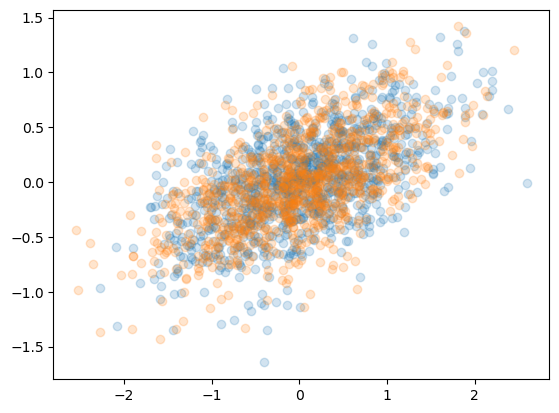

In [26]:
# construct a dataset with a skewed 2D distribution
mu = [0,0] # <== zero mean! useful for later
sigma = [[0.6,0.2],[0.2,0.2]] # asymmetric sigmas
n = 1000
X = np.random.multivariate_normal(mu, sigma, n).T

plt.scatter(X[0,:], X[1,:], alpha=0.2)
plt.show()

In [27]:
# the covariance matrix
np.cov(X)  # Diagonal is the correlation not normalized

array([[0.6346, 0.2137],
       [0.2137, 0.1946]])

In [28]:
# now find the eigenvectors of the covariance matrix..
#l, V = np.linalg.eig(np.cov(X))
l, V = la.eig(np.cov(X))

print (l)
print (V)

# First recall that V is an orthogonal matrix (and thus its transpose is also its inverse)
V.dot(V.T)

[0.7213+0.j 0.1079+0.j]
[[ 0.9266 -0.3759]
 [ 0.3759  0.9266]]


array([[ 1., -0.],
       [-0.,  1.]])

(0.7213345798825226+0j) [0.9266 0.3759]
(0.10790917637365816+0j) [-0.3759  0.9266]


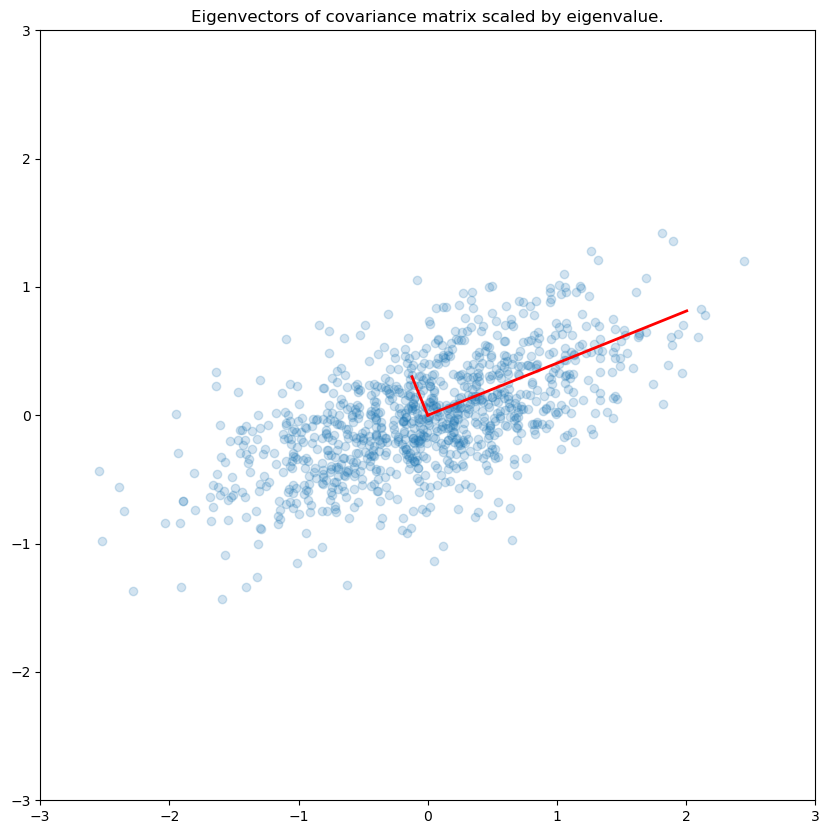

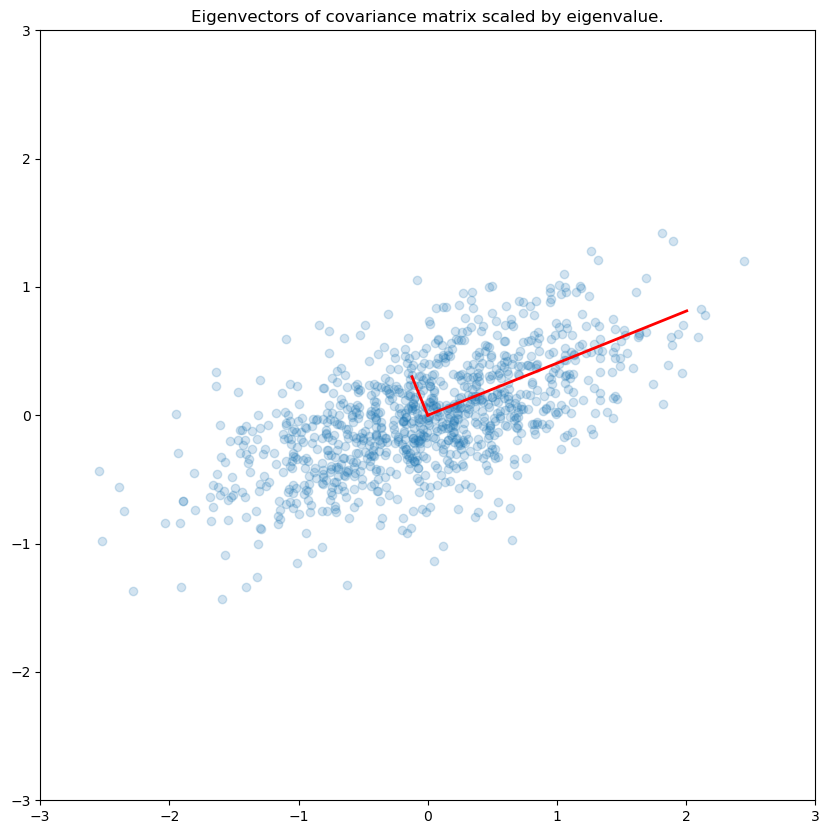

In [30]:
plt.figure(figsize=(10,10))
# the original data distribution
plt.scatter(X[0,:], X[1,:], alpha=0.2)

# a scale factor to emphazise the lines 
scale_factor=3

# draw each eigenvector
for li, vi in zip(l, V.T):
    print (li, vi)
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-3,3,-3,3])
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.');
plt.show()

In the case the features of the datasets have all zero mean, the covariance matrix is of the form:

$$
{\rm Cov}(X)=\frac{XX^T}{n-1}
$$

and thus

[0.7217 0.1079]
[[ 0.9267 -0.3759]
 [ 0.3759  0.9267]]


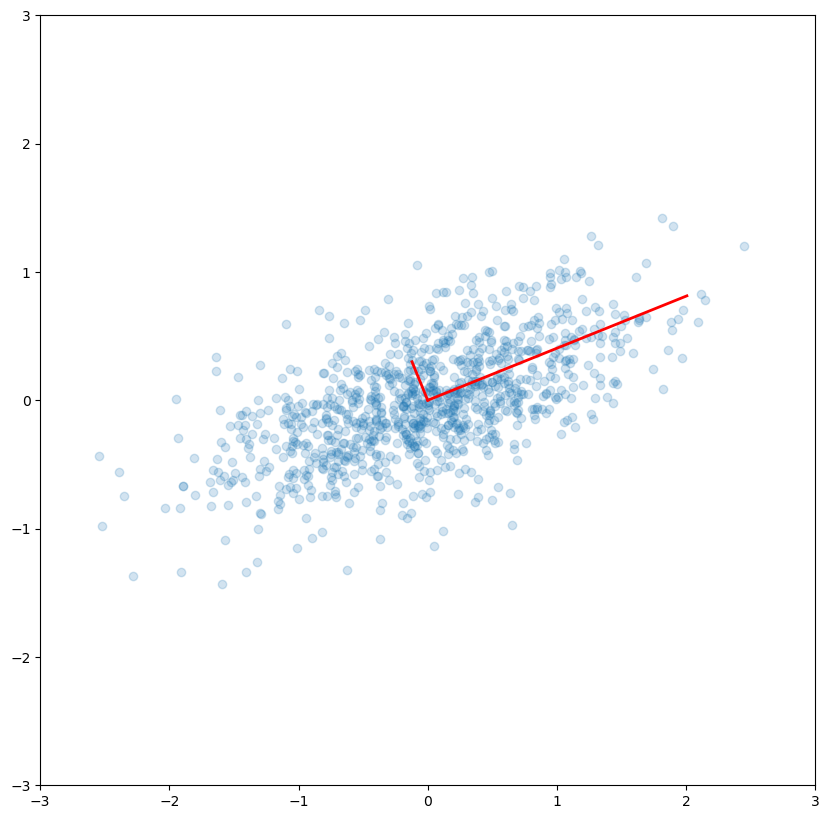

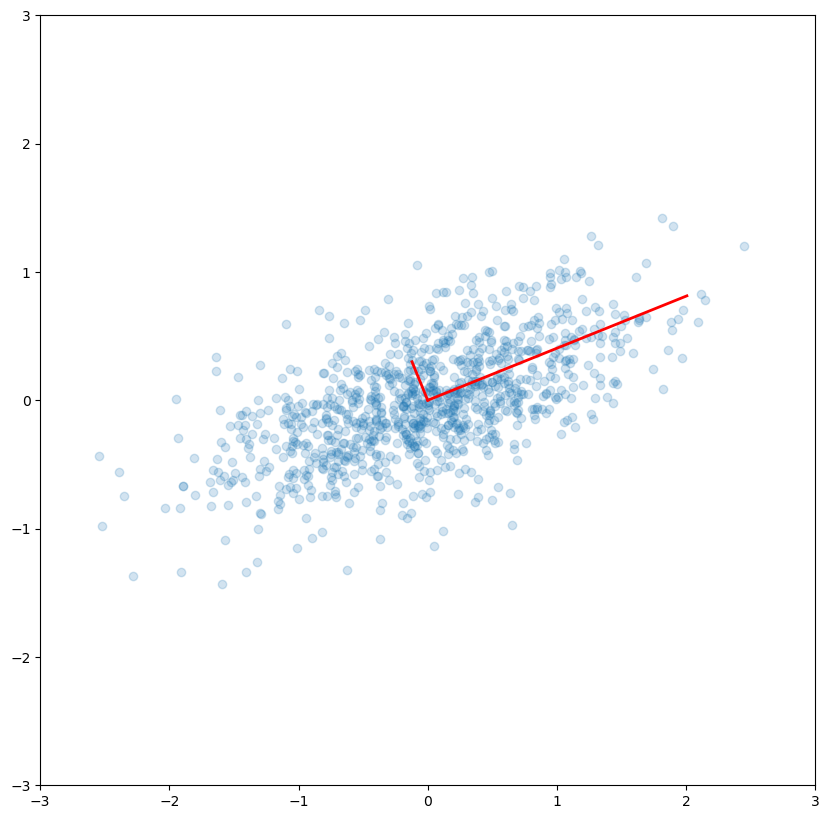

In [32]:
l0, V0 = np.linalg.eig(np.dot(X, X.T)/(n-1))
print (l0)
print (V0)

plt.figure(figsize=(10,10))
plt.scatter(X[0,:], X[1,:], alpha=0.2)
for li, vi in zip(l0, V0.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);
plt.show()

We can now use the eigenvectors and eigenvalues to rotate the data, i.e. take the eigenvectors as new basis vectors and redefine the data points w.r.t this new basis.

In [35]:
# rotate all the data points accordingly to the new base
Xp = np.dot(V0.T, X)


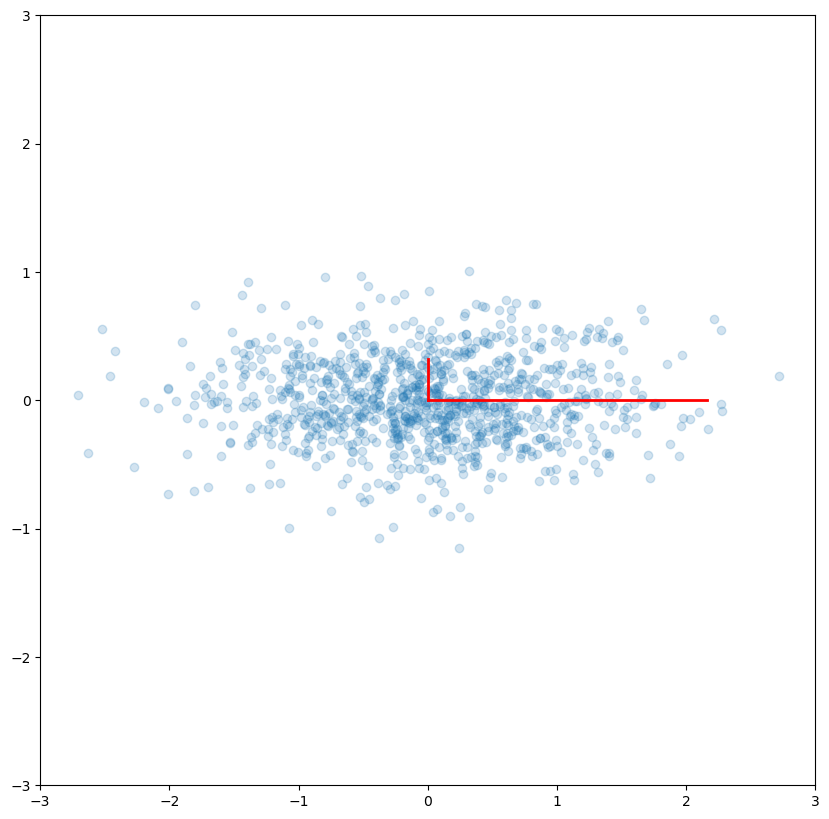

In [47]:
# then plot the rotated dataset and its "axes"
plt.figure(figsize=(10,10))
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l0, np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);
plt.show()

For example, if we only use the first column of $xp$, we will have the projection of the data onto the first principal component, capturing the majority of the variance in the data with a single featrue that is a linear combination of the original features.

We may need to transform the (reduced) data set to the original feature coordinates for interpreation. This is simply another linear transform (matrix multiplication).

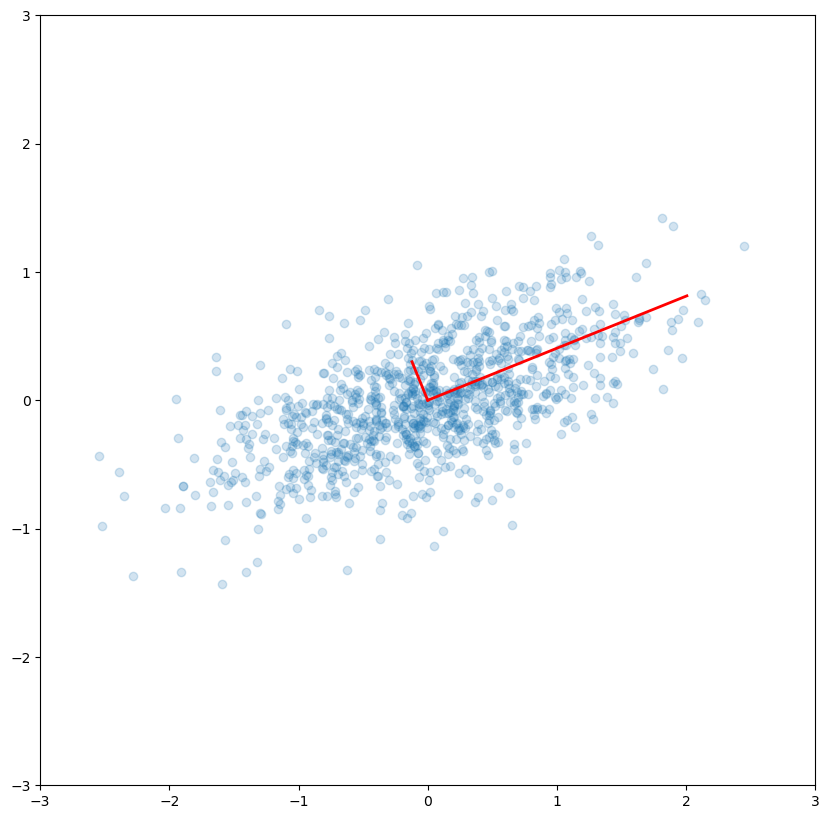

In [46]:
plt.figure(figsize=(10,10))
Xpp = np.dot(V0, Xp)
plt.scatter(Xpp[0,:], Xpp[1,:], alpha=0.2)
for li, vi in zip(l0, V0.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);
plt.show()

## Dimension reduction via PCA


Given the spectral decomposition:

$$ 
A=V\Lambda V^{-1}
$$

with $\Lambda$ of rank $p$. Reducing the dimensionality to $k<p$ simply means setting to zero all but the first $k$ diagonal values (ordered from the largest to the smaller in module; that is the default in numpy/scipy).

In this way we catch the most relevant part of its variability (covariance).

In [48]:
l, V = np.linalg.eig(np.cov(X))
Lambda=np.diag(l)
print (Lambda)
print ("A.trace():", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print (Lambda[0,0]/Lambda.trace())


[[0.7213 0.    ]
 [0.     0.1079]]
A.trace(): 0.8292437562561806
Lambda.trace(): 0.8292437562561807
0.8698703782096112


Since the trace is invariant under change of basis, the total variability is also unchaged by PCA. By keeping only the first $k$ principal components, we can still “explain” 
$\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability. Sometimes, the degree of dimension reduction is specified as keeping enough principal components so that (say) 90% fo the total variability is exlained.

## SVD for PCA

We saw that SVD is a decomposition of the data matrix $X=UDV^T$ where U and V are orthogonal matrices and D is a diagnonal matrix.


Compare with the eigendecomposition of a matrix $A=W\Lambda W^{−1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvalues by $D^2$ (scaled by n−1).

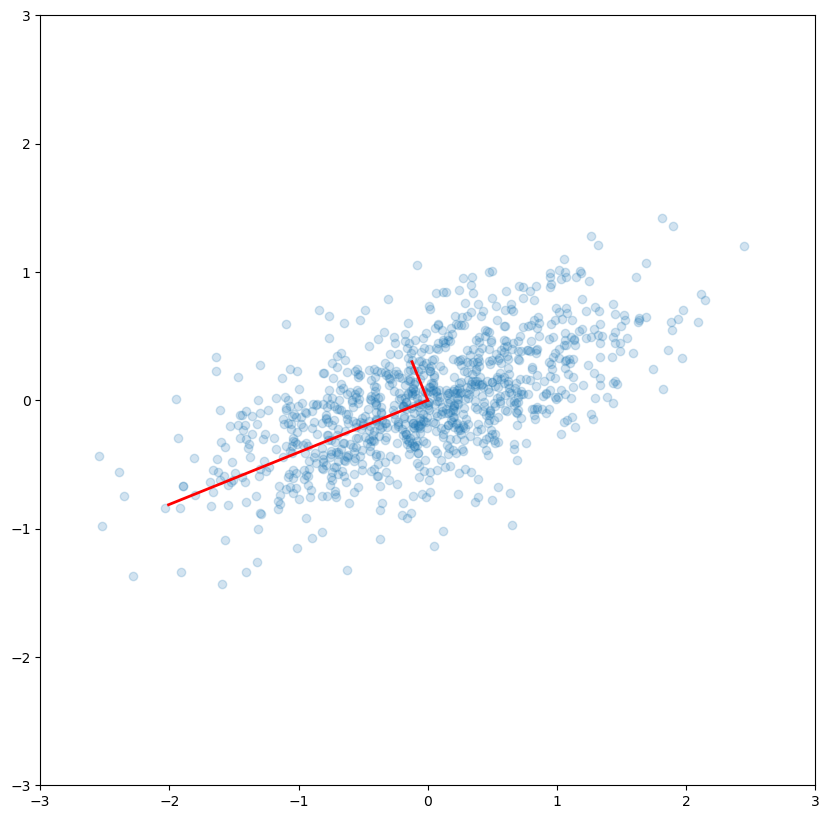

In [55]:
U, spectrum, Vt = np.linalg.svd(X)

l_svd = spectrum**2/(n-1)
V_svd = U

plt.figure(figsize=(10,10))
plt.scatter(X[0,:], X[1,:], alpha=0.2)
for li, vi in zip(l_svd, V_svd):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);
plt.show()

In [50]:
print ("eigendecomposition:",l)
print ("SVD:",l_svd)

eigendecomposition: [0.7213 0.1079]
SVD: [0.7217 0.1079]
